<a href="https://colab.research.google.com/github/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Artificial Intelligence vs Machine Learning vs Deep Learning

**Artificial Intelligence** is the ability of computer program to function like a human brain. 

Whenever a machine completes tasks based on a set of stipulated rules that solve problems (algorithms), such an “intelligent” behavior is what is called artificial intelligence.

**Machine Learning** is the field of study that gives computers ability to learn without being explicitly programmed.

Machine learning programs adjust themselves to a set of data they are exposed to.

**Deep Learning** is a subset of machine learning where algorithms are created and function similar to those in machine learning, but there are numerous layers of these algorithms- each providing a different interpretation to the data it feeds on. 

Such a network of algorithms are called artificial neural networks, being named so as their functioning is an inspiration, or you may say; an attempt at imitating the function of the human neural networks present in the brain.

![image1](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/AIvsMLvsDL.png?raw=true)

Machine learning can be broken down into 3 types: Supervised, Unsupervised, and Reinforcement Learning.

**Supervised Learning** is a type of Machine Learning where the model is provided with labeled data. In simple terms, you are given data with known answers and you use the machine learning model to be able to predict future answers based on the previously provided data.



Supervised learning can be broken down into two types: Regression and Classification

Regression is when the output has a continuous value. For example, housing prices, wind speeds are examples of continuous values within a particular range. The goal is to predict a value as close as possible to the actual output value.

![regression](https://github.com/shaunhyp57/Artificial-Intelligence-Machine-Learning/blob/master/HW_5/img/regression.png?raw=true)

##Basic Concepts

### Linear Regression

**Linear Regression** is a machine learning algorithm based on supervised learning. It performs a regression task, which targets prediction values based on independent variables.


The equation for Linear Regression:

$$
\Large
\begin{equation*}
\hat{y} = b + w_1x_1
\end{equation*}$$


where:

$y$ is the predicted desired output label

$b$ is the bias (the y-intercept, sometimes referred to as $w_0$)

$w_1$ is the weight of feature 1. Weight is the same concept as "slope" in traditional line equation

$x_1$ is a feature (known input)

A more complex model involves multiple features $x_1, x_2, ..., x_n$, each having a separate weight $w_1, w_2,...,w_n$.

$$
\Large
\begin{equation*}
\hat{y}=b+w_1x_1+w_2x_2+...+w_nx_n = b + \displaystyle\sum_{j=1}^{n} w_jx_j
\end{equation*}$$

a more simplified version is 

$$
\Large
\begin{equation*}
\hat{y}=\displaystyle\sum_{j=0}^{n} w_jx_j
\end{equation*}$$

where:

$w_0$ is the bias (y-intercept)

$x_0$ is 1

### Logistic Regression

Logistic regression is a machine learning algorithm based on supervised learning. It performs a classification task, which targets prediction values that can only have discrete values for a given set of features.

Logistic regression uses an activation function (Sigmoid function) to map the values to the classes. 

$$
\Large
\begin{equation*}
\sigma(z)=\frac{1}{1+e^{-z}}
\end{equation*}$$

where

$$
\Large
\begin{equation*}
z = \displaystyle\sum_{j=1}^{n} w_jx_j + b
\end{equation*}$$

The activation function uses a threshold where you are able to map the values to 0 or 1. We make predictions as follows:

$$
\Large
\begin{equation*}
\hbox{class } 0 \hbox{ if } \sigma(z) < \frac{1}{2}
\end{equation*}$$

$$
\Large
\begin{equation*}
\text{class } 1 \text{ if } \sigma(z) \geq \frac{1}{2}
\end{equation*}$$

Let's create a sample linear regression model with random data

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
np.random.seed(3)

m = 100
Xs = 2 * np.random.rand(m, 2)

X1 = np.array([Xs[:,0]]).T
X2 = np.array([Xs[:,1]]).T

y = 4 + 3 * X1 + 3 * X2 + np.random.rand(m, 1)

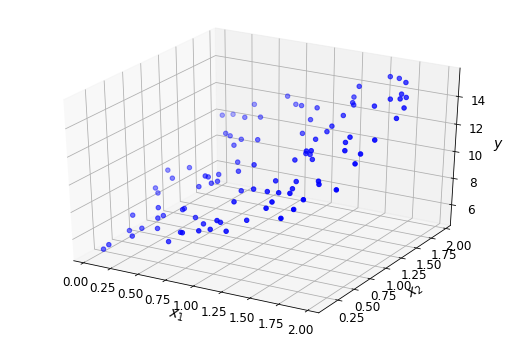

In [0]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, y, c='b', marker='o');
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$');

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), Xs])

Now let's implement linear regression



In [0]:
# number of epochs
epochs = 20

# learning rate
lr = 0.01

In [0]:
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1)
print(initial_weight)

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]]


In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

In [0]:
weight_path_mgd[-1]

array([[3.8757629 ],
       [3.19579451],
       [3.33382127]])

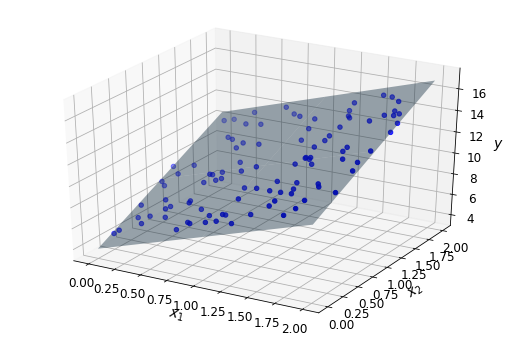

In [0]:
# plane calculation
k = 3 # size of the plane

x1, x2 = np.mgrid[:k, :k]

X = np.hstack((np.reshape(x1, (k*k, 1)), np.reshape(x2, (k*k, 1))))
X = np.hstack((np.ones((k*k, 1)), X))

y_predict = np.reshape(np.dot(X, weight), (k, k))

# plotting
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')

ax.scatter(X1, X2, y, c='b', marker='o')
ax.plot_surface(x1, x2, y_predict, alpha=0.4) # plane plot

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$');

### Logistic Regression

Let's create a sample logistic regression model on random data

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from mpl_toolkits import mplot3d

from random import seed
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

```get_random_data``` creates random dataset that has 2 features

In [0]:
def get_random_data(w, b, mu, sigma, m):
    seed(1)
    
    data_split = (int)(m * 80/100)

    c = np.random.randint(2, size=(m, 1))
    x_1 = np.random.uniform(size=(m, 1))
    n = np.random.normal(mu, sigma, size=(m, 1))

    x_2 = w * x_1 + b + (-1)**c * n

    data = np.concatenate((x_1, x_2), axis=1)
    labels = c

    return ((data[:data_split], labels[:data_split]), (data[data_split:], labels[data_split:]))

```display_random_data``` displays the data points as well as the line of best fit for the train data set

In [0]:
def display_random_data(data, labels, w, b):
  colors = ['red', 'blue']
  plt.scatter(data[:,0].flatten(), data[:,1].flatten(), c=labels.flatten(), cmap=ListedColormap(colors))
  x = np.linspace(0, 1, 100)
  y = w * x + b
  plt.plot(x, y)

  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')

Now we generate some values to create the data and display the line

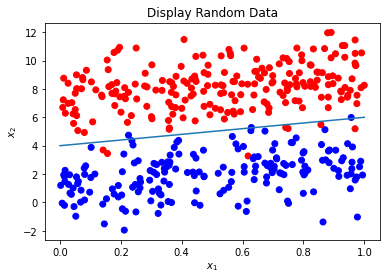

In [0]:
m = 500
w = 2
b = 4
mu = 3
sigma = 1.5
(train_data, train_labels), (test_data, test_labels) = get_random_data(w, b, mu, sigma, m)
display_random_data(train_data, train_labels, w, b)
plt.title('Display Random Data')
plt.show()